## 1 Questions de cours

# Q1) Donner la definition et un cas d’utilisation dans un type de probleme de

## ces fonctions d’activations suivantes:



## Sigmoide:
 La fonction sigmoïde est généralement utilisée comme activation de la dernière couche pour les problèmes de classification binaire

## ReLu:
ReLU est une fonction d’activation très couramment utilisée.
Acronyme de Rectified Linear Unit (unité linéaire rectifiée), elle permet tout simplement de remplacer les résultats négatifs par zéro.

La définition de softmax:
Le principe de softmax est simple : on part d’un vecteur (x_0,x_1,\cdots) avec des coefficients quelconques, et on veut obtenir un vecteur avec des coefficients positifs de somme 1. Il suffit alors :

De remplacer chaque x_i par \exp(x_i) pour obtenir un nombre positif.
Puis de diviser par la somme des coefficients pour le normaliser le résultat

# Q2) Quelles sont les types d’operations mathematiques que l’on retrouve dans
## un neurone artificiel singulier



z(x1,x2) = x1w1 + x2w2 + b

x1,x2= dentrites
w1,w2 =indices
b=biais

## Q3) Comment appelle-t-on l’algorithme d’apprentissage permettant de faire la mise a jour des poids des neurones.



L'algorithme de descente de gradient utilisé pour entraîner le réseau (i.e. mettre à jour les poids) est donné par:

où :

est la valeur des poids avant mise à jour,

est la valeur des poids après mise à jour,

est le taux d'apprentissage (learning rate) 



## Q4)Pourquoi les ConvNets sont meilleurs en performances en terme de traitement d’images que les DNN?

Les réseaux de neurones convolutifs, également connus sous le nom de ConvNets ou CNN, sont de puissants modèles mathématiques pour l’apprentissage automatique de pointe



## Q5) Soit la fonction loss d’une classification binaire definie par:


**Choisir l’expression exact :**


# Q6)Rappeler la definition mathematique de la fonction sigmoıde donner son



Une fonction sigmoïde est une fonction mathématique qui a une courbe caractéristique en forme de S. Il existe un certain nombre de fonctions sigmoïdes courantes, telles que la fonction logistique, la tangente hyperbolique et l’arctangente

# implementions dans un notebook.

In [2]:
# Fonction d'activation sigmoïde
def sigmoid_function(x):
  return 1/(1+np.exp(-x))


# 2 Projet

On utilisant le jeu de donnees X-ray pour la detection de la pneumonie,

implementer l’architecture DenseNet201 en utilisant la methode de votre choix : 

une methode directe ou en utilisant du transfert learning.

Dataset
Les données XRAY depuis ce lien Drive :https://drive.google.com/file/d/1y8p3_LW0pml8AwgmNB7IASJHp8xI7TGg/view

In [103]:
import os

## import essential packages

import os 
import cv2
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

## keras tensorflow 

import tensorflow as tf
import keras
from   tensorflow.keras import layers
from   tensorflow.keras import callbacks
from   tensorflow.keras.models  import Model
from   keras.applications.vgg16 import VGG16
from   keras import backend as K
vgg_conv = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
#resnet = keras.applications.resnet50.ResNet50(include_top=False, 
                                           #   weights='imagenet', input_shape=(224, 224, 3))
K.set_learning_phase(1)

/usr/local/lib/python3.7/dist-packages/keras/backend.py:450: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn('`tf.keras.backend.set_learning_phase` is deprecated and '


In [106]:
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [107]:
%pwd

'/content'

/content/drive/MyDrive/chest_xray.zip

In [108]:
path = "/content/drive/MyDrive/"
#/content/drive/MyDrive/chest_xray.zip


In [109]:
%cd/users/..../téléchargement/chest-xray/

[Errno 2] No such file or directory: '/users/..../téléchargement/chest-xray/'
/content


In [110]:
path = "/content/drive/MyDrive/"
#chest_xray.zip


In [111]:
%%time
import zipfile
with zipfile.ZipFile(path +"chest_xray.zip" ,"r") as zip_ref:
        zip_ref.extractall("")

CPU times: user 9.8 s, sys: 2.53 s, total: 12.3 s
Wall time: 13.1 s


In [112]:
path_files = "/content/chest_xray/"


In [113]:
# train_data_dir = path_files + 'train'
# validation_data_dir = path_files + 'test'

In [114]:
labels = ['PNEUMONIA', 'NORMAL']
image_size = 150

In [115]:
import cv2 as cv

In [116]:
## Une fonction pour faciliter l'affichage des images

def data_loader(data_dir):
    
    """ this is a helper funtion to load image and resize it"""
    
    data = list()
    for label in labels:
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                resized_arr = cv2.resize(img_arr, (image_size, image_size))
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
                
    return np.array(data)

In [117]:
%%time
train = data_loader(path_files + 'train')
test = data_loader(path_files + 'test')

OpenCV(4.1.2) /io/opencv/modules/imgproc/src/resize.cpp:3720: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


OpenCV(4.1.2) /io/opencv/modules/imgproc/src/resize.cpp:3720: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

CPU times: user 45.4 s, sys: 1.23 s, total: 46.6 s
Wall time: 46.4 s


In [118]:
train_data = path_files + 'tarin'
validation_data = path_files + 'test'

Text(0.5, 1.0, 'PNEUMONIA')

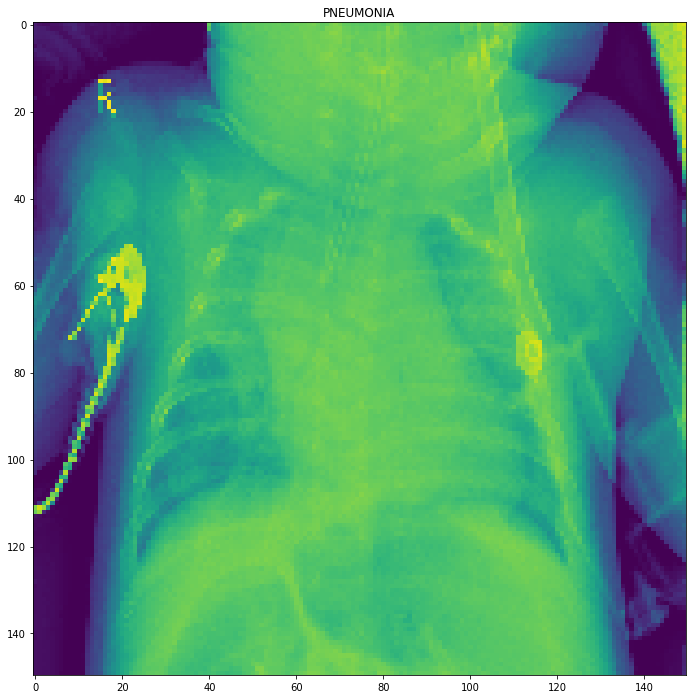

In [120]:
plt.figure(figsize=(12, 12))
plt.imshow(train[2][0])
plt.title(labels[train[2][1]])

In [121]:
print("le nombre d'image dans train", len(train))

le nombre d'image dans train 5232


In [122]:
print("le nombre d'image dans test", len(test))

le nombre d'image dans test 624


In [123]:
IMG_SIZE = 224
BATCH_SIZE = 64
SEED = 42

In [124]:
import glob
import cv2
train_path =os.path.join(path_files,"train")
test_path = os.path.join(path_files,"test")

train_normal = glob.glob(train_path+"/NORMAL/*.jpeg")
train_pneumonia = glob.glob(train_path+"/PNEUMONIA/*.jpeg")

test_normal = glob.glob(test_path+"/NORMAL/*.jpeg")
test_pneumonia = glob.glob(test_path+"/PNEUMONIA/*.jpeg")


In [125]:
test_normal 

['/content/chest_xray/test/NORMAL/NORMAL-1784004-0001.jpeg',
 '/content/chest_xray/test/NORMAL/NORMAL-7695736-0001.jpeg',
 '/content/chest_xray/test/NORMAL/NORMAL-5545906-0001.jpeg',
 '/content/chest_xray/test/NORMAL/NORMAL-4340661-0001.jpeg',
 '/content/chest_xray/test/NORMAL/NORMAL-9343440-0001.jpeg',
 '/content/chest_xray/test/NORMAL/NORMAL-2771774-0001.jpeg',
 '/content/chest_xray/test/NORMAL/NORMAL-7922918-0001.jpeg',
 '/content/chest_xray/test/NORMAL/NORMAL-1931427-0001.jpeg',
 '/content/chest_xray/test/NORMAL/NORMAL-3346259-0001.jpeg',
 '/content/chest_xray/test/NORMAL/NORMAL-8907762-0001.jpeg',
 '/content/chest_xray/test/NORMAL/NORMAL-78265-0001.jpeg',
 '/content/chest_xray/test/NORMAL/NORMAL-1228182-0001.jpeg',
 '/content/chest_xray/test/NORMAL/NORMAL-4172448-0001.jpeg',
 '/content/chest_xray/test/NORMAL/NORMAL-115218-0001.jpeg',
 '/content/chest_xray/test/NORMAL/NORMAL-6518197-0001.jpeg',
 '/content/chest_xray/test/NORMAL/NORMAL-4834475-0001.jpeg',
 '/content/chest_xray/test/

In [126]:
test_path

'/content/chest_xray/test'

In [71]:
test_pneumonia

['/content/chest_xray/test/PNEUMONIA/VIRUS-3426682-0001.jpeg',
 '/content/chest_xray/test/PNEUMONIA/BACTERIA-4161430-0003.jpeg',
 '/content/chest_xray/test/PNEUMONIA/BACTERIA-3961172-0001.jpeg',
 '/content/chest_xray/test/PNEUMONIA/BACTERIA-1351146-0003.jpeg',
 '/content/chest_xray/test/PNEUMONIA/BACTERIA-4167818-0001.jpeg',
 '/content/chest_xray/test/PNEUMONIA/BACTERIA-2429208-0003.jpeg',
 '/content/chest_xray/test/PNEUMONIA/BACTERIA-9857270-0003.jpeg',
 '/content/chest_xray/test/PNEUMONIA/BACTERIA-6950003-0002.jpeg',
 '/content/chest_xray/test/PNEUMONIA/BACTERIA-4167818-0003.jpeg',
 '/content/chest_xray/test/PNEUMONIA/BACTERIA-1602272-0001.jpeg',
 '/content/chest_xray/test/PNEUMONIA/VIRUS-30184-0001.jpeg',
 '/content/chest_xray/test/PNEUMONIA/BACTERIA-1351146-0001.jpeg',
 '/content/chest_xray/test/PNEUMONIA/BACTERIA-840611-0002.jpeg',
 '/content/chest_xray/test/PNEUMONIA/VIRUS-5271295-0001.jpeg',
 '/content/chest_xray/test/PNEUMONIA/VIRUS-2040583-0001.jpeg',
 '/content/chest_xray/tes

In [127]:
train_list = [x for x in train_normal]
train_list.extend([x for x in train_pneumonia])

df_train =pd.DataFrame(np.concatenate([['Normal']*len(train_normal),['Pneumonia']*len(train_pneumonia)]),columns = ['class'])
df_train['image'] = [x for x in train_list]

test_list = [x for x in test_normal]
test_list.extend([x for x in test_pneumonia])

df_test =pd.DataFrame(np.concatenate([['Normal']*len(test_normal),['Pneumonia']*len(test_pneumonia)]),columns = ['class'])
df_test ['image'] = [x for x in test_list]

In [128]:
df_train

,class,image
0,Normal,/content/chest_xray/train/NORMAL/NORMAL-484365...
1,Normal,/content/chest_xray/train/NORMAL/NORMAL-151336...
2,Normal,/content/chest_xray/train/NORMAL/NORMAL-322057...
3,Normal,/content/chest_xray/train/NORMAL/NORMAL-689735...
4,Normal,/content/chest_xray/train/NORMAL/NORMAL-861983...
...,...,...
5227,Pneumonia,/content/chest_xray/train/PNEUMONIA/BACTERIA-5...
5228,Pneumonia,/content/chest_xray/train/PNEUMONIA/BACTERIA-5...
5229,Pneumonia,/content/chest_xray/train/PNEUMONIA/BACTERIA-6...
5230,Pneumonia,/content/chest_xray/train/PNEUMONIA/VIRUS-8498...


In [129]:
df_test

,class,image
0,Normal,/content/chest_xray/test/NORMAL/NORMAL-1784004...
1,Normal,/content/chest_xray/test/NORMAL/NORMAL-7695736...
2,Normal,/content/chest_xray/test/NORMAL/NORMAL-5545906...
3,Normal,/content/chest_xray/test/NORMAL/NORMAL-4340661...
4,Normal,/content/chest_xray/test/NORMAL/NORMAL-9343440...
...,...,...
619,Pneumonia,/content/chest_xray/test/PNEUMONIA/VIRUS-57081...
620,Pneumonia,/content/chest_xray/test/PNEUMONIA/VIRUS-38350...
621,Pneumonia,/content/chest_xray/test/PNEUMONIA/BACTERIA-31...
622,Pneumonia,/content/chest_xray/test/PNEUMONIA/VIRUS-57081...


In [130]:
df_test.shape


(624, 2)

Répartition de la pneumonie

Donnnées train

Train Set - Normal


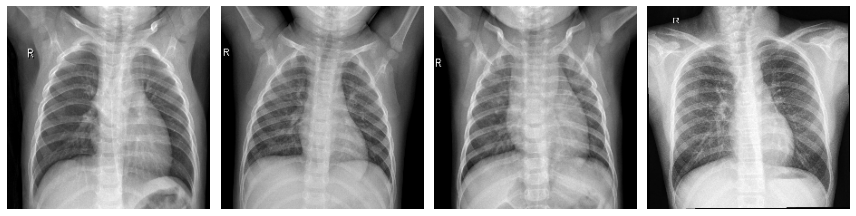

In [131]:
print('Train Set - Normal')

plt.figure(figsize=(12,12))

for i in range(0, 4):
  plt.subplot(3,4,i  + 1)
  img = cv2.imread(train_normal[i])
  img = cv2.resize(img,  (IMG_SIZE,IMG_SIZE))
  plt.imshow(img)
  plt.axis("off")
plt.tight_layout() 

plt.show()

Train Set - Pneumonia


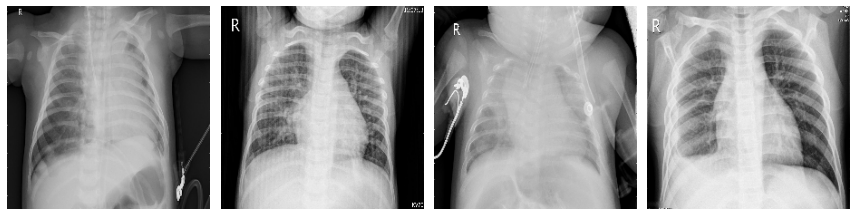

In [133]:
print('Train Set - Pneumonia')

plt.figure(figsize=(12,12))

for i in range(0, 4):
  plt.subplot(3,4,i  + 1)
  img = cv2.imread(train_pneumonia[i])
  img = cv2.resize(img,  (IMG_SIZE,IMG_SIZE))
  plt.imshow(img)
  plt.axis("off")
plt.tight_layout() 

plt.show()

In [134]:
from sklearn.model_selection import train_test_split

train_df, valid_df = train_test_split(df_train, test_size = 0.15, random_state = SEED , stratify = df_train['class'])
print(train_df.shape)
print(valid_df.shape)

(4447, 2)
(785, 2)


In [136]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.,
                                  zoom_range = 0.1,
                                  width_shift_range = 0.1,
                                  height_shift_range = 0.1)
val_datagen = ImageDataGenerator(rescale=1/255.)

ds_train = train_datagen.flow_from_dataframe(train_df,
                                             x_col = 'image',
                                             y_col = 'class',
                                             target_size = (IMG_SIZE, IMG_SIZE),
                                             class_mode = 'binary',
                                             batch_size = BATCH_SIZE,
                                             seed = SEED)

ds_val = val_datagen.flow_from_dataframe(valid_df,
                                             x_col = 'image',
                                             y_col = 'class',
                                             target_size = (IMG_SIZE, IMG_SIZE),
                                             class_mode = 'binary',
                                             batch_size = BATCH_SIZE,
                                             seed = SEED)

ds_test = val_datagen.flow_from_dataframe(df_test,
                                          x_col = 'image',
                                          y_col = 'class',
                                          target_size = (IMG_SIZE, IMG_SIZE),
                                          class_mode = 'binary',
                                          batch_size = 1,
                                          Shuffle = False)


Found 4447 validated image filenames belonging to 2 classes.
Found 785 validated image filenames belonging to 2 classes.
Found 624 validated image filenames belonging to 2 classes.


## Modele DenseNet 201

In [145]:
model =keras.models.Sequential()

model.add( keras.layers.Input((IMG_SIZE,  IMG_SIZE, 3)))

model.add(  keras.layers.Conv2D(56, (3,3),  activation='relu'))
model.add( keras.layers.MaxPooling2D((2,2)))
model.add( keras.layers.Dropout(0.5))

model.add( keras.layers.Conv2D(28, (3,3), activation='relu'))
model.add( keras.layers.MaxPooling2D((2,2)))
model.add( keras.layers.Dropout(0.5))

model.add( keras.layers.Conv2D(14, (3,3), activation='relu'))
model.add( keras.layers.MaxPooling2D((2,2)))
model.add( keras.layers.Dropout(0.5))


model.add( keras.layers.Flatten())
model.add( keras.layers.Dense(512, activation='relu'))
model.add( keras.layers.Dense(1024, activation='relu'))
model.add( keras.layers.Dense(1024, activation='relu'))
model.add( keras.layers.Dropout(0.2))

model.add( keras.layers.Dense(1, activation='sigmoid'))

In [138]:
model.summary()

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['binary_accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 56)      1568      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 56)     0         
 )                                                               
                                                                 
 dropout_1 (Dropout)         (None, 111, 111, 56)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 28)      14140     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 28)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 54, 54, 28)        0

In [139]:
%%time
batch_size = 120
epochs      = 5
history = model.fit( ds_train,
                     batch_size        = batch_size,  
                     epochs            = epochs,
                     verbose           =1,
                     validation_data   = ds_val)
         

Epoch 1/5
70/70 [==============================] - 92s 1s/step - loss: 0.6961 - binary_accuracy: 0.7306 - val_loss: 0.6451 - val_binary_accuracy: 0.7427
Epoch 2/5
70/70 [==============================] - 90s 1s/step - loss: 0.4743 - binary_accuracy: 0.7787 - val_loss: 0.5184 - val_binary_accuracy: 0.7911
Epoch 3/5
70/70 [==============================] - 90s 1s/step - loss: 0.3304 - binary_accuracy: 0.8550 - val_loss: 0.3638 - val_binary_accuracy: 0.8688
Epoch 4/5
70/70 [==============================] - 89s 1s/step - loss: 0.2625 - binary_accuracy: 0.8867 - val_loss: 0.2806 - val_binary_accuracy: 0.9032
Epoch 5/5
70/70 [==============================] - 90s 1s/step - loss: 0.2371 - binary_accuracy: 0.9031 - val_loss: 0.2930 - val_binary_accuracy: 0.8764
CPU times: user 7min 57s, sys: 6.7 s, total: 8min 4s
Wall time: 8min 23s


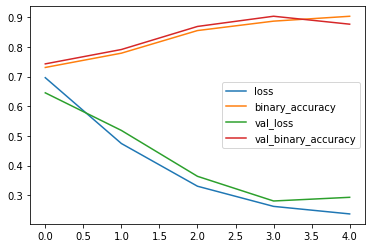

In [141]:
pd.DataFrame(history.history).plot()

<function matplotlib.pyplot.show>

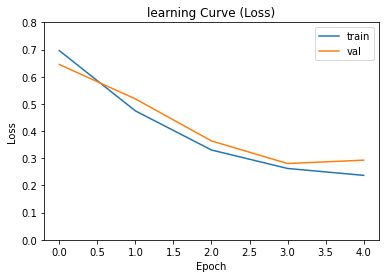

In [140]:
fig, ax=plt.subplots(figsize=(6,4))
sns.lineplot(x = history.epoch, y = history.history['loss'])
sns.lineplot(x = history.epoch, y = history.history['val_loss'])
ax.set_title('learning Curve (Loss)')
ax.set_ylabel('Loss')
ax.set_xlabel('Epoch')
ax.set_ylim(0, 0.8)
ax.legend(['train','val'],loc='best')
plt.show

<function matplotlib.pyplot.show>

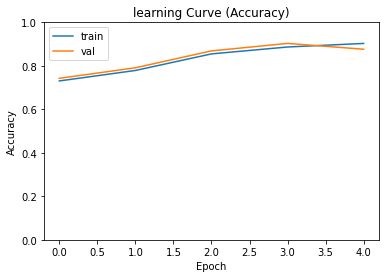

In [142]:
fig,ax = plt.subplots(figsize=(6,4))
sns.lineplot(x = history.epoch, y = history.history['binary_accuracy'])
sns.lineplot(x = history.epoch, y = history.history['val_binary_accuracy'])
ax.set_title('learning Curve (Accuracy)')
ax.set_ylabel('Accuracy')
ax.set_xlabel('Epoch')
ax.set_ylim(0.0,1.0)
ax.legend(['train','val'],loc='best')
plt.show

In [143]:
score2 = model.evaluate(ds_test, steps = len(df_test), verbose = 0)

print('Test Loss:' , score2[0])
print('Test accuracy:' , score2[1])

Test Loss: 0.5223488211631775
Test accuracy: 0.7115384340286255


In [144]:
score2 = model.evaluate(ds_val, steps = len(valid_df), verbose=0)

print('Val Loss:' , score2[0])
print('Val accuracy:' , score2[1])

Val Loss: 0.29303422570228577
Val accuracy: 0.8764331340789795


FIN